In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import Image
import os

plt.style.use("seaborn-v0_8-darkgrid")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
data = pd.read_csv("/UCordoba/Machine Learning/Data/CBC data_for_meandeley_csv.csv")

In [49]:
data.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S. No.     364 non-null    float64
 1   Age        364 non-null    float64
 2   Sex        364 non-null    float64
 3     RBC      365 non-null    object 
 4   PCV        365 non-null    object 
 5   MCV        365 non-null    object 
 6   MCH        365 non-null    object 
 7    MCHC      364 non-null    float64
 8    RDW       365 non-null    object 
 9   TLC        365 non-null    object 
 10   PLT /mm3  365 non-null    object 
 11   HGB       365 non-null    object 
dtypes: float64(4), object(8)
memory usage: 35.2+ KB


In [51]:
data.describe()

,S. No.,Age,Sex,MCHC
count,364.000000,364.000000,364.000000,364.000000
mean,182.500000,44.917582,0.442308,32.053407
std,105.221988,18.780854,0.497344,2.801790
min,1.000000,11.000000,0.000000,23.600000
25%,91.750000,28.000000,0.000000,30.300000
50%,182.500000,44.500000,0.000000,31.700000
75%,273.250000,60.000000,1.000000,33.300000
max,364.000000,89.000000,1.000000,50.200000


In [52]:
data = data.copy()

In [53]:
print(data.columns)

Index(['S. No.', 'Age      ', 'Sex  ', '  RBC    ', 'PCV', 'MCV  ', 'MCH',
       ' MCHC  ', ' RDW    ', 'TLC', ' PLT /mm3', ' HGB '],
      dtype='object')


In [56]:
data.columns = data.columns.str.replace(' ', '')
print(data.columns)

Index(['S.No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC',
       'PLT/mm3', 'HGB'],
      dtype='object')


In [57]:
filtered_data = data.dropna(ignore_index=True)
data=filtered_data.copy()

In [58]:
data.describe()

,S.No.,Age,Sex,MCHC
count,364.000000,364.000000,364.000000,364.000000
mean,182.500000,44.917582,0.442308,32.053407
std,105.221988,18.780854,0.497344,2.801790
min,1.000000,11.000000,0.000000,23.600000
25%,91.750000,28.000000,0.000000,30.300000
50%,182.500000,44.500000,0.000000,31.700000
75%,273.250000,60.000000,1.000000,33.300000
max,364.000000,89.000000,1.000000,50.200000


In [59]:
filtered_data.Age[filtered_data.Age<18]

7      14.0
8      16.0
38     14.0
56     15.0
57     13.0
60     15.0
61     13.0
66     14.0
69     13.0
70     13.0
72     17.0
83     17.0
121    15.0
128    11.0
137    16.0
151    14.0
161    13.0
172    17.0
181    12.0
198    16.0
212    16.0
216    16.0
280    14.0
294    14.0
327    14.0
359    17.0
Name: Age, dtype: float64

In [60]:
len(filtered_data)

364

In [61]:
data.drop(filtered_data[filtered_data['Age'] < 18].index,inplace=True)
filtered_data.drop(filtered_data[filtered_data['Age'] < 18].index,inplace=True)
filtered_data.reset_index(inplace=True)
data.reset_index(inplace=True)

In [62]:
len(filtered_data)

338

In [63]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    338 non-null    int64  
 1   S.No.    338 non-null    float64
 2   Age      338 non-null    float64
 3   Sex      338 non-null    float64
 4   RBC      338 non-null    object 
 5   PCV      338 non-null    object 
 6   MCV      338 non-null    object 
 7   MCH      338 non-null    object 
 8   MCHC     338 non-null    float64
 9   RDW      338 non-null    object 
 10  TLC      338 non-null    object 
 11  PLT/mm3  338 non-null    object 
 12  HGB      338 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 34.5+ KB


In [64]:
filtered_data = filtered_data.astype("float64")

In [65]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    338 non-null    float64
 1   S.No.    338 non-null    float64
 2   Age      338 non-null    float64
 3   Sex      338 non-null    float64
 4   RBC      338 non-null    float64
 5   PCV      338 non-null    float64
 6   MCV      338 non-null    float64
 7   MCH      338 non-null    float64
 8   MCHC     338 non-null    float64
 9   RDW      338 non-null    float64
 10  TLC      338 non-null    float64
 11  PLT/mm3  338 non-null    float64
 12  HGB      338 non-null    float64
dtypes: float64(13)
memory usage: 34.5 KB


In [66]:
filtered_data.columns

Index(['index', 'S.No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC',
       'RDW', 'TLC', 'PLT/mm3', 'HGB'],
      dtype='object')

In [67]:
filtered_data["HGB"]=[(2 if filtered_data["HGB"][item] >15 else 0 if filtered_data["HGB"][item] < 12 else 1) if filtered_data["Sex"][item] == 0.0 else (2 if filtered_data["HGB"][item] >14 else 0 if filtered_data["HGB"][item] < 11 else 1) for item in range(len(filtered_data))]

In [68]:
filtered_data["PCV"]=[(2 if filtered_data["PCV"][item] >48.6 else 0 if filtered_data["PCV"][item] < 38.3 else 1) if filtered_data["Sex"][item] == 0.0 else (2 if filtered_data["PCV"][item] >44.9 else 0 if filtered_data["PCV"][item] < 35.5 else 1) for item in range(len(filtered_data))]

In [69]:
filtered_data["MCHC"]=[2 if item >38 else 0 if item < 30 else 1 for item in filtered_data["MCHC"]]

In [70]:
filtered_data["MCH"]=[2 if item >35 else 0 if item < 25 else 1 for item in filtered_data["MCH"]]

In [71]:
filtered_data["RDW"]=[2 if item >16 else 0 if item < 12.5 else 1 for item in filtered_data["RDW"]]

In [72]:
filtered_data["PLT/mm3"]=[2 if item >450 else 0 if item < 140 else 1 for item in filtered_data["PLT/mm3"]]

In [73]:
filtered_data["RBC"]=[2 if item >5.8 else 0 if item < 4 else 1 for item in filtered_data["RBC"]]

In [74]:
filtered_data["MCV"]=[2 if item >115 else 0 if item < 75 else 1 for item in filtered_data["MCV"]]

In [75]:
filtered_data["TLC"]=[2 if item >11 else 0 if item < 3 else 1 for item in filtered_data["TLC"]]

In [76]:
filtered_data["Age"]=[3 if item >64 else 2 if item > 48 else 1 if item>32 else 0 for item in filtered_data["Age"]]

In [77]:
filtered_data2=filtered_data.drop(["Age","Sex","S.No.","index"],axis=1,inplace=False)

In [80]:
filtered_data2

,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB
0,1,0,0,0,0,2,2,0,0
1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1
3,1,0,1,1,1,1,2,1,0
4,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
333,1,0,0,0,1,2,1,1,0
334,1,0,1,1,1,1,1,1,1
335,1,1,1,1,1,1,1,1,1
336,1,1,1,1,1,1,1,1,1


In [81]:
def find_diagnose(feature):
    filtered_data2["diseased"]=[1 if filtered_data2[feature][item] == 0 or filtered_data2[feature][item] == 2 else filtered_data2["diseased"][item] for item in range(len(filtered_data2))]

In [82]:
filtered_data2["diseased"] = 0
for item in filtered_data2.columns:
    if(item!="diseased"):
        find_diagnose(item)

In [83]:
data["diseased"]=filtered_data2["diseased"]
filtered_data["diseased"]=filtered_data2["diseased"]
data = data.astype("float64")

In [84]:
data.head()

,index,S.No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB,diseased
0,0.0,1.0,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,1.0
1,1.0,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,0.0
2,2.0,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,0.0
3,3.0,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3,1.0
4,4.0,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5,0.0


In [85]:
data

,index,S.No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB,diseased
0,0.0,1.0,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,1.0
1,1.0,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,0.0
2,2.0,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,0.0
3,3.0,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3,1.0
4,4.0,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,358.0,359.0,22.0,0.0,4.65,29.1,62.6,20.4,32.6,17.0,6.70,200.0,9.5,1.0
334,360.0,361.0,51.0,0.0,4.85,35.2,91.7,31.0,33.8,13.3,5.60,215.0,15.0,1.0
335,361.0,362.0,21.0,1.0,4.47,39.7,88.7,29.3,33.0,13.5,9.20,329.0,13.1,0.0
336,362.0,363.0,35.0,1.0,4.75,36.2,86.7,27.9,32.1,13.5,6.48,174.0,13.2,0.0


In [90]:
# Creación DataFrame:

data.to_csv("/UCordoba/Machine Learning/Data/Sickle_data_conf.csv")

In [91]:
corr=data.corr().drop(['S.No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC',
       'PLT/mm3', 'HGB'],axis=1)
corr=corr.drop(["diseased",'S.No.'],axis=0)

In [92]:
corr.head(corr.size)

,index,diseased
index,1.000000,0.007529
Age,-0.001488,0.175140
Sex,0.106251,0.071761
RBC,-0.008885,-0.219272
PCV,0.006406,-0.323698
MCV,-0.012648,-0.078948
MCH,0.150259,-0.037811
MCHC,0.197904,0.047310
RDW,-0.124502,0.292969
TLC,0.024247,0.165078


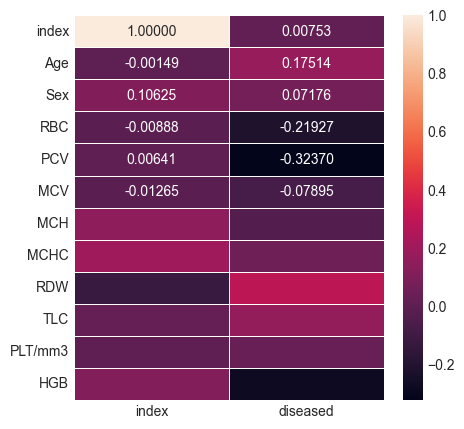

In [93]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.5f',ax=ax,)
plt.show()

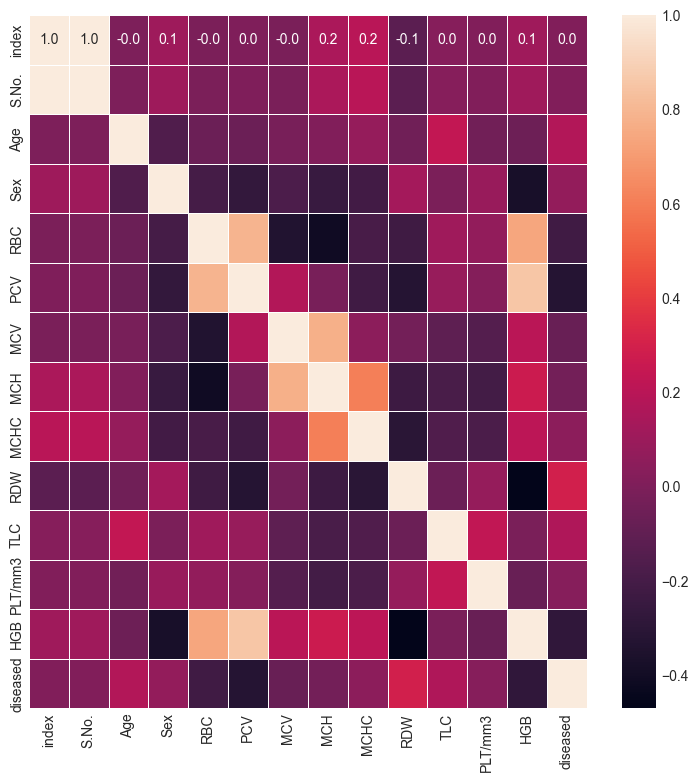

In [94]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,)
plt.show()

In [95]:
def scatter_plot(names):
    plt.scatter(data[names[0]][data["diseased"]==1],data[names[1]][data["diseased"]==1],color="red",alpha=0.5,label="diseased")
    plt.scatter(data[names[0]][data["diseased"]==0],data[names[1]][data["diseased"]==0],color="blue",alpha=0.6,label="not diseased")
    plt.xlabel(names[0])
    plt.ylabel(names[1])
    plt.legend()

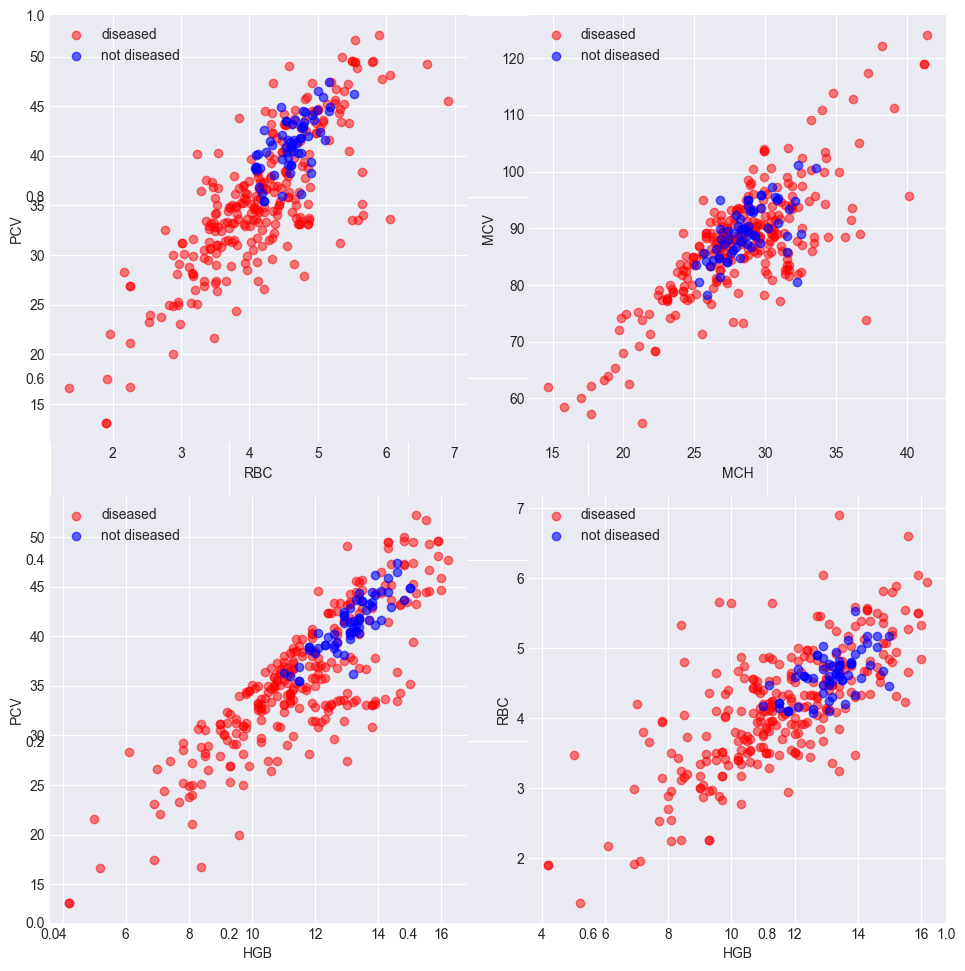

In [96]:
plt.subplots(figsize=(10, 10))
plt.subplot(2, 2, 1)
scatter_plot(["RBC","PCV"])
plt.subplot(2, 2, 2)
scatter_plot(["MCH","MCV"])
plt.subplot(2, 2, 3)
scatter_plot(["HGB","PCV"])
plt.subplot(2, 2, 4)
scatter_plot(["HGB","RBC"])
plt.tight_layout()
plt.show()

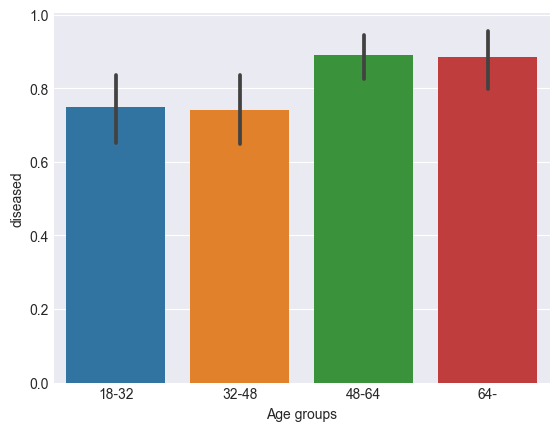

In [97]:
sns.barplot(filtered_data,x="Age",y="diseased")
plt.xticks(ticks=(0,1,2,3),labels=("18-32","32-48","48-64","64-"))
plt.xlabel("Age groups")
plt.ylabel("diseased")
plt.show()

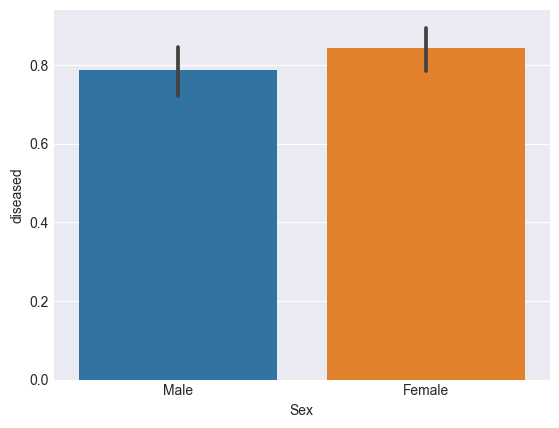

In [98]:
sns.barplot(data,x="Sex",y="diseased")
plt.xticks(ticks=(0,1),labels=("Male","Female"))
plt.xlabel("Sex")
plt.ylabel("diseased")
plt.show()

In [99]:
female_mild_anemia=filtered_data[(filtered_data.Sex==1.0) & (filtered_data.HGB==0)][filtered_data.columns[0]].count()
female_normal_anemia=filtered_data[(filtered_data.Sex==1.0) & (filtered_data.HGB==1)][filtered_data.columns[0]].count()
female_anemia=filtered_data[filtered_data.Sex==1.0]["S.No."].count()

print("when sex is female")
print("mild anemia count is :",female_mild_anemia)
print("normal anemia count is :",female_normal_anemia)
print("mild anemia count is :",female_mild_anemia/female_anemia)

when sex is female
mild anemia count is : 68
normal anemia count is : 82
mild anemia count is : 0.44155844155844154


In [100]:
male_mild_anemia=filtered_data[(filtered_data.Sex==0.0) & (filtered_data.HGB==0)][filtered_data.columns[0]].count()
male_normal_anemia=filtered_data[(filtered_data.Sex==0.0) & (filtered_data.HGB==1)][filtered_data.columns[0]].count()
male_anemia=filtered_data[filtered_data.Sex==0.0]["S.No."].count()

print("when sex is male")
print("mild anemia count is :",male_mild_anemia)
print("normal anemia count is :",male_normal_anemia)
print("mild anemia count is :",male_mild_anemia/male_anemia)

when sex is male
mild anemia count is : 54
normal anemia count is : 112
mild anemia count is : 0.29347826086956524
